In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Load K-Means clustered data
df = pd.read_csv('../data/customer_data_clustered.csv')

print("="*80)
print("CUSTOMER SEGMENT ANALYSIS & BUSINESS INSIGHTS")
print("="*80)
print(f"\n✅ Loaded {len(df):,} customers with cluster assignments")
print(f"✅ Total clusters identified: {df['Cluster'].nunique()}")

# Define features
features = ['Annual_Income', 'Spending_Score', 'Total_Purchases', 
            'Avg_Transaction_Value', 'Tenure_Months', 
            'Website_Visits_Monthly', 'Email_Open_Rate', 'Age']

print(f"\n📊 Analyzing {len(features)} customer characteristics")

CUSTOMER SEGMENT ANALYSIS & BUSINESS INSIGHTS

✅ Loaded 50,000 customers with cluster assignments
✅ Total clusters identified: 5

📊 Analyzing 8 customer characteristics


In [2]:
# Analyze each cluster and assign business names
print("\n" + "="*80)
print("ANALYZING CLUSTERS FOR SEGMENT NAMING")
print("="*80)

cluster_stats = df.groupby('Cluster')[features].mean()

# Define segment names and strategies based on characteristics
segment_names = {}
segment_descriptions = {}
marketing_strategies = {}

for cluster_id in range(5):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    avg_income = cluster_data['Annual_Income'].mean()
    avg_spending = cluster_data['Spending_Score'].mean()
    avg_purchases = cluster_data['Total_Purchases'].mean()
    avg_engagement = cluster_data['Email_Open_Rate'].mean()
    avg_tenure = cluster_data['Tenure_Months'].mean()
    
    print(f"\nCluster {cluster_id}: Income=${avg_income:,.0f}, Spending={avg_spending:.0f}, "
          f"Purchases={avg_purchases:.0f}, Engagement={avg_engagement:.1%}")
    
    # Intelligent segment naming
    if avg_income > 90000 and avg_spending > 60:
        segment_names[cluster_id] = "💎 Premium High Spenders"
        segment_descriptions[cluster_id] = "Affluent customers with strong purchasing power and high engagement"
        marketing_strategies[cluster_id] = "VIP programs, luxury product lines, exclusive early access, personalized concierge service"
        
    elif avg_spending > 65 and avg_engagement > 0.45:
        segment_names[cluster_id] = "🔥 Engaged Enthusiasts"
        segment_descriptions[cluster_id] = "Highly engaged customers who love the brand despite moderate income"
        marketing_strategies[cluster_id] = "Personalized recommendations, social media campaigns, limited-time offers, referral bonuses"
        
    elif avg_income > 70000 and avg_purchases > 25 and avg_tenure > 35:
        segment_names[cluster_id] = "🏆 Loyal Professionals"
        segment_descriptions[cluster_id] = "Stable, reliable customers with consistent purchase behavior"
        marketing_strategies[cluster_id] = "Loyalty rewards program, subscription services, bulk purchase discounts, exclusive member benefits"
        
    elif avg_income < 50000 and avg_spending < 40:
        segment_names[cluster_id] = "💰 Budget Conscious"
        segment_descriptions[cluster_id] = "Price-sensitive customers seeking value and affordability"
        marketing_strategies[cluster_id] = "Value bundles, flash sales, clearance promotions, entry-level products, financing options"
        
    else:
        segment_names[cluster_id] = "🌱 Potential Growers"
        segment_descriptions[cluster_id] = "Moderate engagement with significant growth potential"
        marketing_strategies[cluster_id] = "Educational content, cross-selling opportunities, gradual upselling, nurture campaigns"

# Add segment names to dataframe
df['Segment_Name'] = df['Cluster'].map(segment_names)

print("\n✅ All segments named and categorized!")


ANALYZING CLUSTERS FOR SEGMENT NAMING

Cluster 0: Income=$101,255, Spending=67, Purchases=20, Engagement=27.4%

Cluster 1: Income=$43,858, Spending=19, Purchases=20, Engagement=18.5%

Cluster 2: Income=$46,418, Spending=21, Purchases=20, Engagement=48.2%

Cluster 3: Income=$46,918, Spending=21, Purchases=20, Engagement=25.5%

Cluster 4: Income=$48,652, Spending=23, Purchases=20, Engagement=27.3%

✅ All segments named and categorized!


In [3]:
# Print detailed profiles
print("\n" + "="*80)
print("DETAILED CUSTOMER SEGMENT PROFILES")
print("="*80)

for cluster_id in sorted(segment_names.keys()):
    cluster_data = df[df['Cluster'] == cluster_id]
    n_customers = len(cluster_data)
    pct_total = (n_customers / len(df)) * 100
    
    print(f"\n{'='*80}")
    print(f"{segment_names[cluster_id]}")
    print(f"{'='*80}")
    print(f"📊 Size: {n_customers:,} customers ({pct_total:.1f}% of total)")
    print(f"\n📝 Description:")
    print(f"   {segment_descriptions[cluster_id]}")
    
    print(f"\n📈 Key Metrics:")
    print(f"   • Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"   • Average Annual Income: ${cluster_data['Annual_Income'].mean():,.2f}")
    print(f"   • Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"   • Total Purchases: {cluster_data['Total_Purchases'].mean():.1f} purchases")
    print(f"   • Avg Transaction Value: ${cluster_data['Avg_Transaction_Value'].mean():.2f}")
    print(f"   • Customer Tenure: {cluster_data['Tenure_Months'].mean():.1f} months")
    print(f"   • Website Visits/Month: {cluster_data['Website_Visits_Monthly'].mean():.1f}")
    print(f"   • Email Open Rate: {cluster_data['Email_Open_Rate'].mean():.1%}")
    print(f"   • Days Since Last Purchase: {cluster_data['Days_Since_Last_Purchase'].mean():.1f}")
    
    print(f"\n💡 Recommended Marketing Strategy:")
    print(f"   {marketing_strategies[cluster_id]}")
    
    # Calculate potential revenue
    revenue = cluster_data['Total_Purchases'].sum() * cluster_data['Avg_Transaction_Value'].mean()
    print(f"\n💵 Estimated Segment Revenue: ${revenue:,.2f}")


DETAILED CUSTOMER SEGMENT PROFILES

💎 Premium High Spenders
📊 Size: 8,591 customers (17.2% of total)

📝 Description:
   Affluent customers with strong purchasing power and high engagement

📈 Key Metrics:
   • Average Age: 40.0 years
   • Average Annual Income: $101,254.78
   • Spending Score: 66.9/100
   • Total Purchases: 19.9 purchases
   • Avg Transaction Value: $96.45
   • Customer Tenure: 25.4 months
   • Website Visits/Month: 11.8
   • Email Open Rate: 27.4%
   • Days Since Last Purchase: 60.2

💡 Recommended Marketing Strategy:
   VIP programs, luxury product lines, exclusive early access, personalized concierge service

💵 Estimated Segment Revenue: $16,525,505.03

💰 Budget Conscious
📊 Size: 16,270 customers (32.5% of total)

📝 Description:
   Price-sensitive customers seeking value and affordability

📈 Key Metrics:
   • Average Age: 40.1 years
   • Average Annual Income: $43,857.57
   • Spending Score: 18.8/100
   • Total Purchases: 20.2 purchases
   • Avg Transaction Value: $7

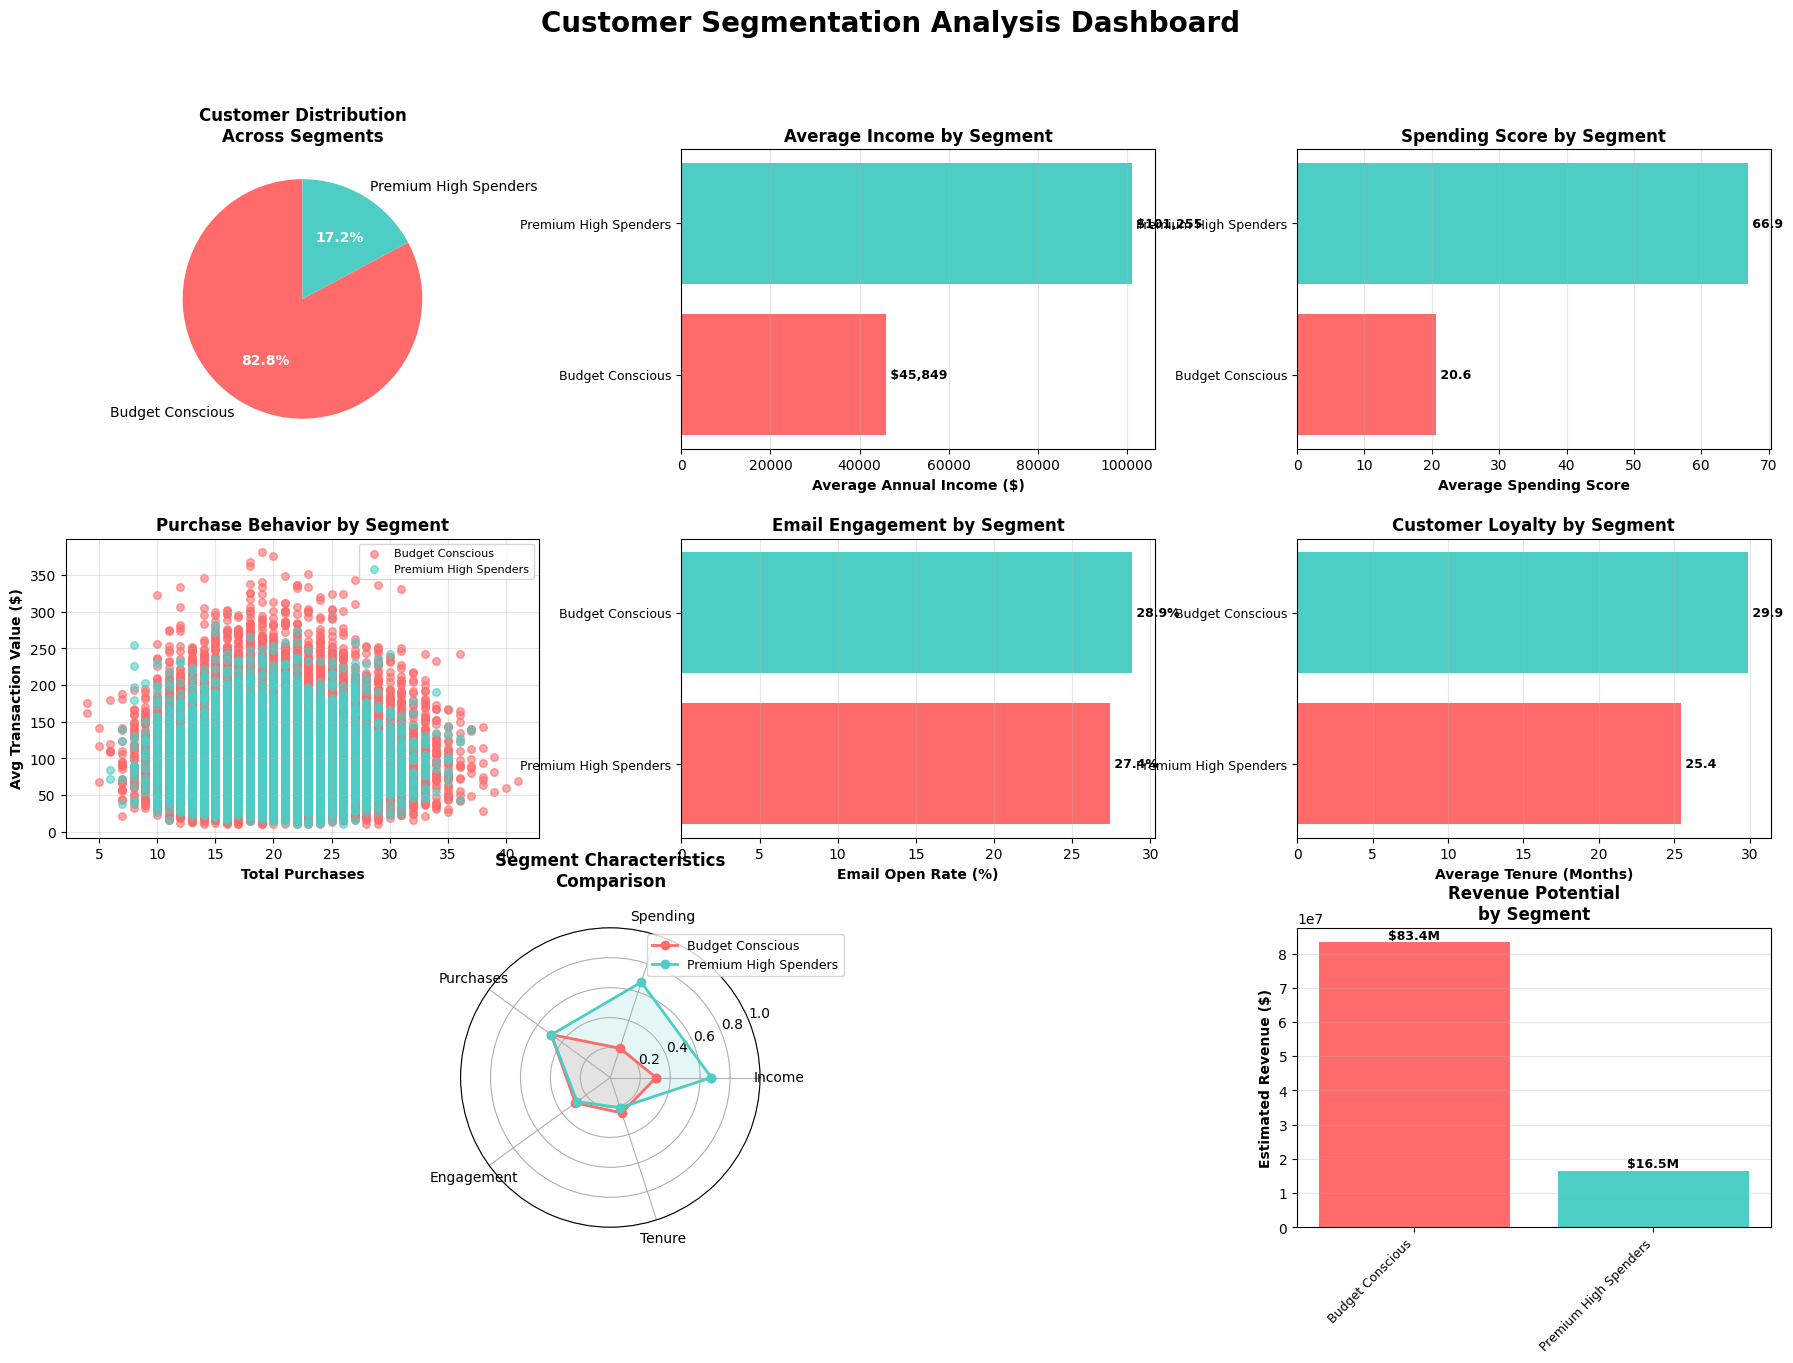


✅ Saved: visualization/segment_analysis_dashboard.png


In [4]:
# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(22, 14))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

fig.suptitle('Customer Segmentation Analysis Dashboard', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Segment Size Distribution (Pie Chart)
ax1 = fig.add_subplot(gs[0, 0])
segment_sizes = df['Segment_Name'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax1.pie(segment_sizes.values, 
                                     labels=[s.split(' ', 1)[1] for s in segment_sizes.index],
                                     autopct='%1.1f%%', 
                                     colors=colors, 
                                     startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
ax1.set_title('Customer Distribution\nAcross Segments', fontweight='bold', fontsize=12)

# 2. Income by Segment
ax2 = fig.add_subplot(gs[0, 1])
segment_income = df.groupby('Segment_Name')['Annual_Income'].mean().sort_values(ascending=True)
bars = ax2.barh(range(len(segment_income)), segment_income.values, color=colors)
ax2.set_yticks(range(len(segment_income)))
ax2.set_yticklabels([s.split(' ', 1)[1] for s in segment_income.index], fontsize=9)
ax2.set_xlabel('Average Annual Income ($)', fontsize=10, fontweight='bold')
ax2.set_title('Average Income by Segment', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_income.values):
    ax2.text(v, i, f' ${v:,.0f}', va='center', fontsize=9, fontweight='bold')

# 3. Spending Score by Segment
ax3 = fig.add_subplot(gs[0, 2])
segment_spending = df.groupby('Segment_Name')['Spending_Score'].mean().sort_values(ascending=True)
bars = ax3.barh(range(len(segment_spending)), segment_spending.values, color=colors)
ax3.set_yticks(range(len(segment_spending)))
ax3.set_yticklabels([s.split(' ', 1)[1] for s in segment_spending.index], fontsize=9)
ax3.set_xlabel('Average Spending Score', fontsize=10, fontweight='bold')
ax3.set_title('Spending Score by Segment', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_spending.values):
    ax3.text(v, i, f' {v:.1f}', va='center', fontsize=9, fontweight='bold')

# 4. Purchases vs Transaction Value
ax4 = fig.add_subplot(gs[1, 0])
for idx, segment in enumerate(df['Segment_Name'].unique()):
    segment_data = df[df['Segment_Name'] == segment]
    ax4.scatter(segment_data['Total_Purchases'], 
               segment_data['Avg_Transaction_Value'],
               label=segment.split(' ', 1)[1], 
               alpha=0.6, 
               s=30,
               color=colors[idx])
ax4.set_xlabel('Total Purchases', fontsize=10, fontweight='bold')
ax4.set_ylabel('Avg Transaction Value ($)', fontsize=10, fontweight='bold')
ax4.set_title('Purchase Behavior by Segment', fontweight='bold', fontsize=12)
ax4.legend(fontsize=8, loc='upper right')
ax4.grid(True, alpha=0.3)

# 5. Email Engagement
ax5 = fig.add_subplot(gs[1, 1])
segment_engagement = df.groupby('Segment_Name')['Email_Open_Rate'].mean().sort_values(ascending=True)
bars = ax5.barh(range(len(segment_engagement)), segment_engagement.values * 100, color=colors)
ax5.set_yticks(range(len(segment_engagement)))
ax5.set_yticklabels([s.split(' ', 1)[1] for s in segment_engagement.index], fontsize=9)
ax5.set_xlabel('Email Open Rate (%)', fontsize=10, fontweight='bold')
ax5.set_title('Email Engagement by Segment', fontweight='bold', fontsize=12)
ax5.grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_engagement.values * 100):
    ax5.text(v, i, f' {v:.1f}%', va='center', fontsize=9, fontweight='bold')

# 6. Customer Tenure
ax6 = fig.add_subplot(gs[1, 2])
segment_tenure = df.groupby('Segment_Name')['Tenure_Months'].mean().sort_values(ascending=True)
bars = ax6.barh(range(len(segment_tenure)), segment_tenure.values, color=colors)
ax6.set_yticks(range(len(segment_tenure)))
ax6.set_yticklabels([s.split(' ', 1)[1] for s in segment_tenure.index], fontsize=9)
ax6.set_xlabel('Average Tenure (Months)', fontsize=10, fontweight='bold')
ax6.set_title('Customer Loyalty by Segment', fontweight='bold', fontsize=12)
ax6.grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_tenure.values):
    ax6.text(v, i, f' {v:.1f}', va='center', fontsize=9, fontweight='bold')

# 7. Radar Chart - Segment Comparison
ax7 = fig.add_subplot(gs[2, :2], projection='polar')
categories = ['Income', 'Spending', 'Purchases', 'Engagement', 'Tenure']
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i, segment in enumerate(df['Segment_Name'].unique()):
    segment_data = df[df['Segment_Name'] == segment]
    values = [
        segment_data['Annual_Income'].mean() / df['Annual_Income'].max(),
        segment_data['Spending_Score'].mean() / 100,
        segment_data['Total_Purchases'].mean() / df['Total_Purchases'].max(),
        segment_data['Email_Open_Rate'].mean(),
        segment_data['Tenure_Months'].mean() / df['Tenure_Months'].max()
    ]
    values += values[:1]
    ax7.plot(angles, values, 'o-', linewidth=2, label=segment.split(' ', 1)[1], color=colors[i])
    ax7.fill(angles, values, alpha=0.15, color=colors[i])

ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(categories, fontsize=10)
ax7.set_ylim(0, 1)
ax7.set_title('Segment Characteristics\nComparison', fontsize=12, fontweight='bold', pad=30)
ax7.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=9)
ax7.grid(True)

# 8. Revenue Potential
ax8 = fig.add_subplot(gs[2, 2])
segment_revenue = []
segment_labels = []
for segment in df['Segment_Name'].unique():
    segment_data = df[df['Segment_Name'] == segment]
    revenue = segment_data['Total_Purchases'].sum() * segment_data['Avg_Transaction_Value'].mean()
    segment_revenue.append(revenue)
    segment_labels.append(segment.split(' ', 1)[1])

bars = ax8.bar(range(len(segment_revenue)), segment_revenue, color=colors)
ax8.set_xticks(range(len(segment_revenue)))
ax8.set_xticklabels(segment_labels, rotation=45, ha='right', fontsize=9)
ax8.set_ylabel('Estimated Revenue ($)', fontsize=10, fontweight='bold')
ax8.set_title('Revenue Potential\nby Segment', fontweight='bold', fontsize=12)
ax8.grid(axis='y', alpha=0.3)
for i, v in enumerate(segment_revenue):
    ax8.text(i, v, f'${v/1e6:.1f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.savefig('../visualization/segment_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Saved: visualization/segment_analysis_dashboard.png")

In [5]:
# Calculate business impact
print("\n" + "="*80)
print("PROJECTED BUSINESS IMPACT")
print("="*80)

# Current metrics
current_avg_purchases = df['Total_Purchases'].mean()
current_avg_transaction = df['Avg_Transaction_Value'].mean()
total_customers = len(df)

print(f"\n📊 Current Performance:")
print(f"   • Total Customers: {total_customers:,}")
print(f"   • Avg Purchases per Customer: {current_avg_purchases:.2f}")
print(f"   • Avg Transaction Value: ${current_avg_transaction:.2f}")

# Estimated current revenue
current_revenue = total_customers * current_avg_purchases * current_avg_transaction
print(f"   • Estimated Annual Revenue: ${current_revenue:,.2f}")

# Projected improvement with targeted marketing
improvement_rate = 0.15  # 15% improvement
projected_purchases = current_avg_purchases * (1 + improvement_rate)
projected_revenue = total_customers * projected_purchases * current_avg_transaction
revenue_increase = projected_revenue - current_revenue

print(f"\n🚀 Projected Impact with Segmented Marketing:")
print(f"   • Expected Engagement Improvement: {improvement_rate*100:.0f}%")
print(f"   • Projected Avg Purchases: {projected_purchases:.2f}")
print(f"   • Projected Annual Revenue: ${projected_revenue:,.2f}")
print(f"   • Potential Revenue Increase: ${revenue_increase:,.2f} (+{improvement_rate*100:.0f}%)")

# ROI calculation
marketing_cost_per_customer = 50  # Assumed cost
total_marketing_cost = total_customers * marketing_cost_per_customer
roi = ((revenue_increase - total_marketing_cost) / total_marketing_cost) * 100

print(f"\n💰 Return on Investment:")
print(f"   • Estimated Marketing Cost: ${total_marketing_cost:,.2f}")
print(f"   • Net Revenue Gain: ${revenue_increase - total_marketing_cost:,.2f}")
print(f"   • ROI: {roi:.1f}%")


PROJECTED BUSINESS IMPACT

📊 Current Performance:
   • Total Customers: 50,000
   • Avg Purchases per Customer: 20.00
   • Avg Transaction Value: $99.88
   • Estimated Annual Revenue: $99,901,017.47

🚀 Projected Impact with Segmented Marketing:
   • Expected Engagement Improvement: 15%
   • Projected Avg Purchases: 23.00
   • Projected Annual Revenue: $114,886,170.09
   • Potential Revenue Increase: $14,985,152.62 (+15%)

💰 Return on Investment:
   • Estimated Marketing Cost: $2,500,000.00
   • Net Revenue Gain: $12,485,152.62
   • ROI: 499.4%


In [6]:
# Save final dataset with segment names
df.to_csv('../data/customer_data_final.csv', index=False)

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)
print(f"\n📁 Files Created:")
print(f"   • customer_data_final.csv (with segment names)")
print(f"   • segment_analysis_dashboard.png")
print(f"\n🎯 Ready for presentation and GitHub!")


✅ ANALYSIS COMPLETE!

📁 Files Created:
   • customer_data_final.csv (with segment names)
   • segment_analysis_dashboard.png

🎯 Ready for presentation and GitHub!
